# Business Objectives

## I will explore the dataset from Amazon to gain insights from Amazon Sales:




1. 💬 What are the most common customer complaints by category?


2. 🗣️ What is the emotional tone of customer reviews for specific product?




# About Dataset

This dataset is having the data of 1K+ Amazon Product's Ratings and Reviews as per their details listed on the official website of Amazon.

The Amazon Sales Dataset provides rich transactional data which can extract powerful *customer support and business insights*.



## Libraries Usage

In [65]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from openai import OpenAI

import os
from dotenv import load_dotenv

# text preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from scipy.ndimage import rotate
from wordcloud import WordCloud

# Download required tokenizer
# nltk.download('punkt')
load_dotenv()

True

# Data Understanding:

In [66]:
df = pd.read_csv("./data/amazon.csv")
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


### 1. Data Info:

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

- Identifiers: product_id, user_id, review_id.
- Object columns: product_name, category, about_product, user_name, review_title, review_content, img_link, product_link.
- Number columns: discounted_price, actual_price, discount_percentage, rating, rating_count.

### 2. Null values:

In [68]:
df.isna().sum().sort_values(ascending=False).head()

rating_count        2
product_id          0
product_name        0
category            0
discounted_price    0
dtype: int64

In [69]:
df[df['rating_count'].isna()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
282,B0B94JPY2N,Amazon Brand - Solimo 65W Fast Charging Braide...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹999,80%,3.0,NaN,USB C to C Cable: This cable has type C connec...,AE7CFHY23VAJT2FI4NZKKP6GS2UQ,Pranav,RUB7U91HVZ30,The cable works but is not 65W as advertised,I have a pd supported car charger and I bought...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Amazon-Brand-Charging-Su...
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple...",Computers&Accessories|Accessories&Peripherals|...,₹249,₹999,75%,5.0,NaN,💎[The Fastest Charge] - This iPhone USB C cabl...,AGJC5O5H5BBXWUV7WRIEIOOR3TVQ,Abdul Gafur,RQXD5SAMMPC6L,Awesome Product,Quick delivery.Awesome ProductPacking was good...,https://m.media-amazon.com/images/I/31-q0xhaTA...,https://www.amazon.in/REDTECH-Lightning-Certif...


In [70]:
df['rating_count'] = df['rating_count'].fillna(0)

### 3. Duplicated values:

In [71]:
df.duplicated().sum()

np.int64(0)

### 4. Convert data types:

In [72]:
number_columns = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']

df[number_columns] = df[number_columns].replace({'₹': '',
                                               '%': '',
                                               ',': '',
                                               r'\|': ''}, regex=True).replace('', np.nan)

# convert all number_columns to numeric
df[number_columns] = df[number_columns].astype(float)

# Quick EDA

### 1. Distribution of numerical values:

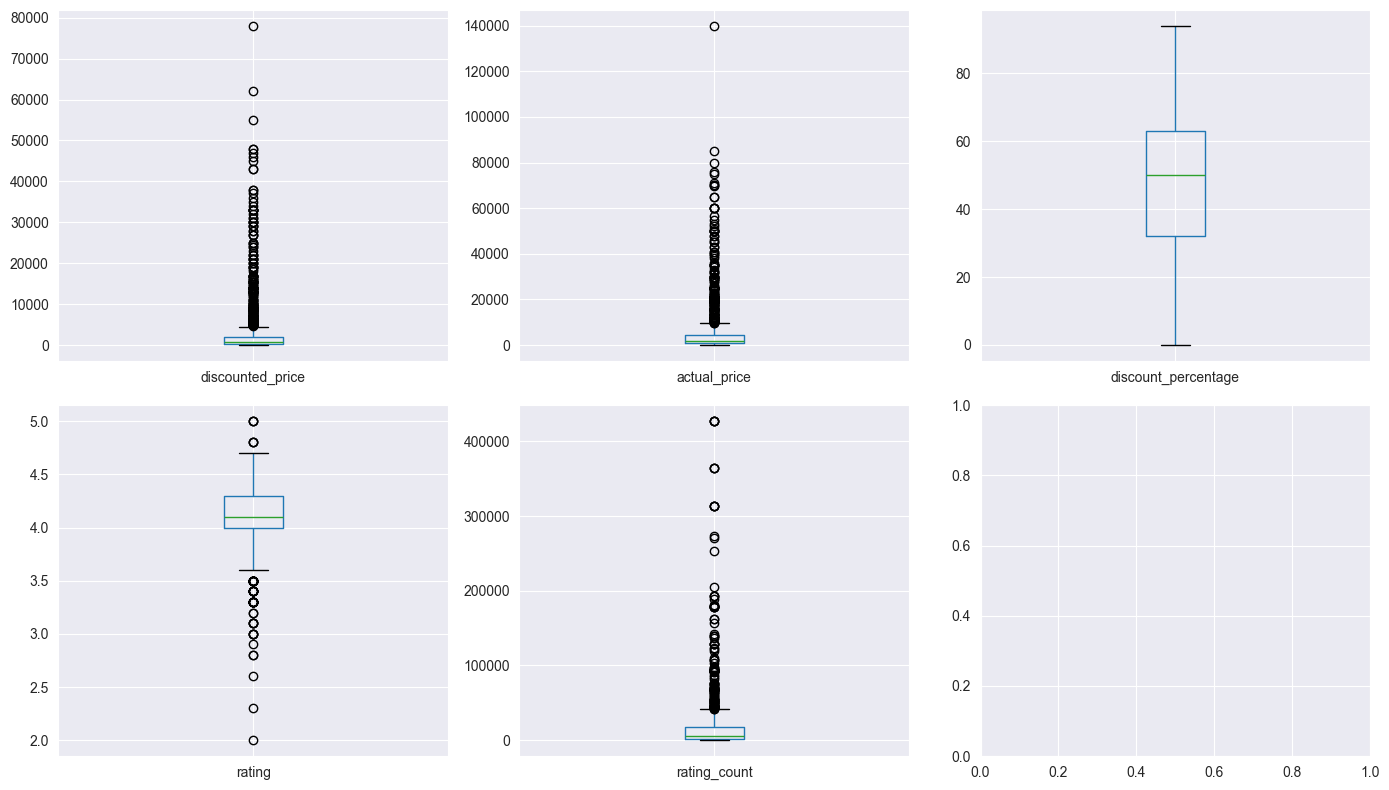

In [73]:
fig, axes = plt.subplots(2, 3)

for i, el in enumerate(df[number_columns]):
    ax = df[number_columns].boxplot(el, ax=axes.flatten()[i])

fig.set_size_inches(14, 8)
plt.tight_layout()

plt.show()

### 2. Top 5 Categories:

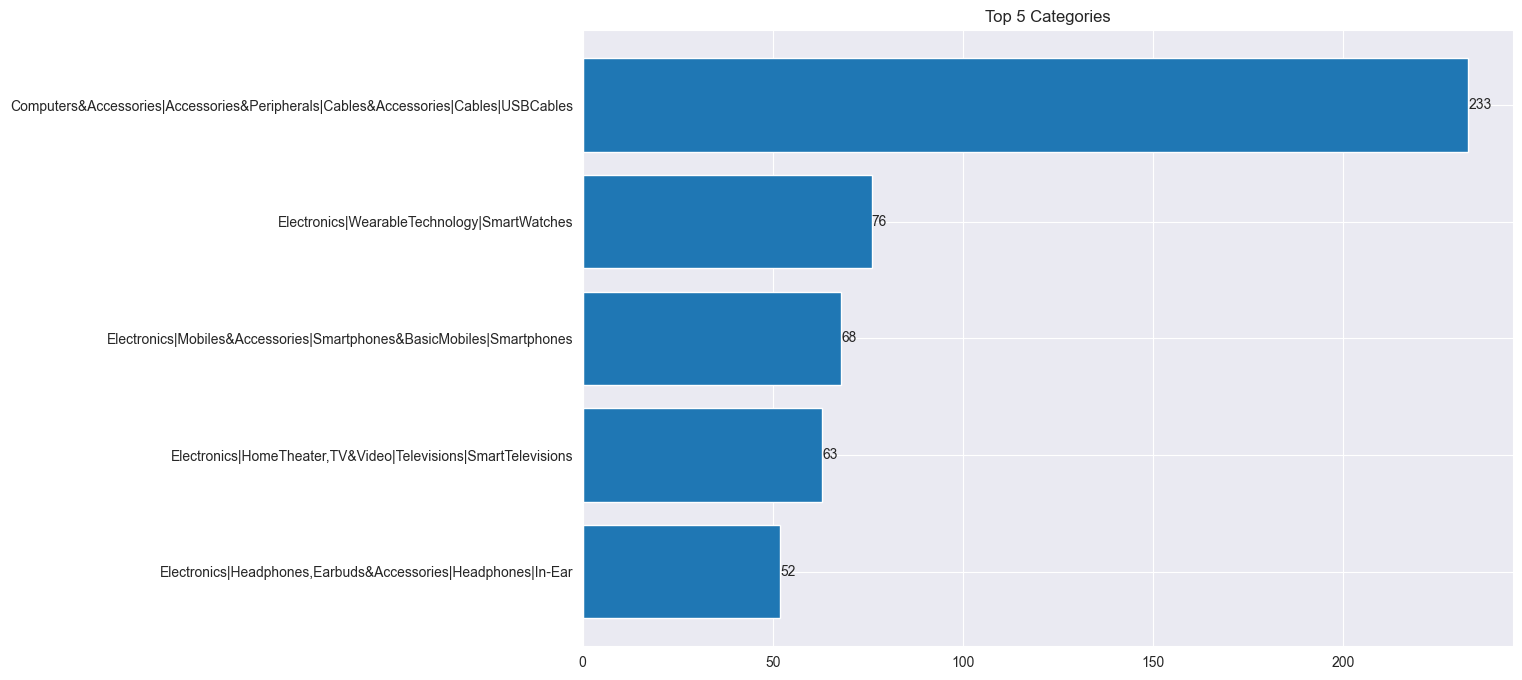

In [74]:
df_category = df['category'].value_counts().sort_values(ascending=True).tail(5)
fig, axes = plt.subplots(figsize=(12, 8))

container_bar = plt.barh(df_category.index, df_category)
plt.bar_label(container_bar)
plt.title('Top 5 Categories')
plt.show()

# Data Cleaning

### 1. Remove redundant columns:

In [75]:
unnecessary_columns = ['product_id', 'about_product', 'user_id', 'user_name', 'review_id', 'img_link', 'product_link']
df = df.drop(columns=unnecessary_columns)

### 2. Text preprocessing:

In [76]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):

    # lowercase the text
    text = str(text).lower()

    # remove special characters and digits
    text = re.sub(r'[^a-z\s]', ' ', text)

    # tokenize the text
    tokens = text.split()

    # Remove stop words and lemmatize the remaining tokens
    clean_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Join tokens back into a single string
    cleaned_text = ' '.join(clean_tokens)

    return cleaned_text

df['cleaned_title'] = df['review_title'].apply(clean_text)
df['cleaned_content'] = df['review_content'].apply(clean_text)

### 3. WordCloud:

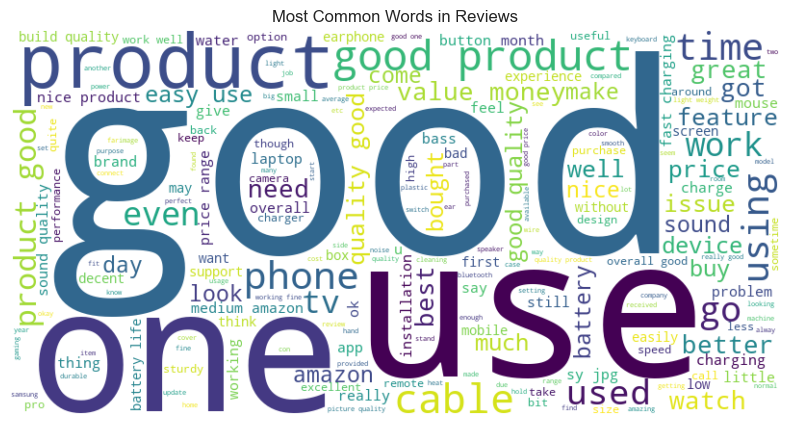

In [77]:
# Combine all review text
all_reviews = " ".join(df["cleaned_content"])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_reviews)

# Plot word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Reviews")
plt.show()

# LLMs

### 1. Emotional Detection:

In [78]:
client = OpenAI(api_key=os.getenv("OPEN_API_KEY"))

def detect_emotion_gpt(review_text):
    prompt = f"""
    What is the dominant emotion expressed in the following product review?
    Choose from: Delight, Frustration, Loyalty, Regret, Neutral.
    Just return only the Emotion.

    Review: "{review_text}"

    Emotion:
    """
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[
            {"role": "system", "content": "You're an expert at detecting emotional tone in text."},
            {"role": "user", "content": prompt}
        ]
    )

    response_dict = response.model_dump()
    return response_dict['choices'][0]['message']['content'].strip()

In [79]:
# use openai key api to detect the emotion of text
df['emotion'] = df['cleaned_content'].apply(detect_emotion_gpt)

In [106]:
df['emotion'] = df['emotion'].apply(lambda x: 'Neutral' if 'Neutral' in x else x )

### a. Products with The Most Frustration:

- SHREENOVA ID116 Plus Bluetooth Fitness Smart Watch for Men Women and Kids Activity Tracker (Black)
- Personal Size Blender, Portable Blender, Battery Powered USB Blender, with Four Blades, Mini Blender Travel Bottle for Juice, Shakes, and Smoothies (Pink).
- MR. BRAND Portable USB Juicer Electric USB Juice Maker Mixer Bottle Blender Grinder Mixer,6 Blades Rechargeable Bottle with (Multi color) (MULTI MIXER 6 BLED).
- Khaitan ORFin Fan heater for Home and kitchen-K0 2215.
- Green Tales Heat Seal Mini Food Sealer-Impulse Machine for Sealing Plastic Bags Packaging.
- IONIX Tap filter Multilayer | Activated Carbon Faucet Water Filters Universal Interface Home Kitchen Faucet Tap Water Clean Purifier Filter Cartridge Five Layer Water Filter-Pack of 1.

In [83]:
# Top products with most frustration
df[(df['emotion'] == 'Frustration') & (df['rating'] < 3)]

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,review_title,review_content,cleaned_title,cleaned_content,emotion
545,SHREENOVA ID116 Plus Bluetooth Fitness Smart W...,Electronics|WearableTechnology|SmartWatches,281.0,1999.0,86.0,2.8,87.0,"Very Good prodat,Battery life is 0 day,Good,Wh...","Good Prodat,Battery life is so bad.,Nice produ...",good prodat battery life day good switch butto...,good prodat battery life bad nice product disl...,Frustration
1243,"Personal Size Blender, Portable Blender, Batte...",Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,669.0,1499.0,55.0,2.3,13.0,"Nice product i recommend to buy,Do not buy!! D...","I liked that it is so convenient to carry,Wast...",nice product recommend buy buy defective produ...,liked convenient carry waste money defective p...,Frustration
1286,MR. BRAND Portable USB Juicer Electric USB Jui...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,499.0,2199.0,77.0,2.8,109.0,"Portable but not much powerful,not so good. po...","Not sufficient power,the product is more like ...",portable much powerful good power back poor li...,sufficient power product like toy kid use prop...,Frustration
1309,Khaitan ORFin Fan heater for Home and kitchen-...,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...",1299.0,2495.0,48.0,2.0,2.0,"Bad quality,Amazing product..",The heating capacity is zero .Moreover i have ...,bad quality amazing product,heating capacity zero moreover initiated retur...,Frustration
1356,Green Tales Heat Seal Mini Food Sealer-Impulse...,Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...,161.0,300.0,46.0,2.6,24.0,"It is broken,Could have been a bit better,The ...",It is broken and it is not useful. Please chan...,broken could bit better first one working repl...,broken useful please change product product pl...,Frustration
1449,IONIX Tap filter Multilayer | Activated Carbon...,Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...,199.0,699.0,72.0,2.9,159.0,"Stop working after few days,Ok. Changing every...","Stop working after few days,Ok,It doesn't fit ...",stop working day ok changing every month toomu...,stop working day ok fit easily little water pr...,Frustration


In [88]:
# extract broad_category by category
df['broad_category'] = df['category'].str.split('|').str[0]

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,review_title,review_content,cleaned_title,cleaned_content,emotion,broad_category
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64.0,4.2,24269.0,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,satisfied charging really fast value money pro...,look durable charging fine toono complains cha...,Neutral,Computers&Accessories
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43.0,4.0,43994.0,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,good braided cable type c device good quality ...,ordered cable connect phone android auto car c...,Frustration,Computers&Accessories
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90.0,3.9,7928.0,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",good speed earlier version good product workin...,quite durable sturdy http medium amazon com im...,Neutral,Computers&Accessories
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53.0,4.2,94363.0,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",good product good one nice really nice product...,good product long wire charge good nice bought...,Neutral,Computers&Accessories
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61.0,4.2,16905.0,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",good original decent good one secondary use be...,bought instead original apple work r fast appl...,Delight,Computers&Accessories


### b. Top 5 Categories with The Most Frustration:

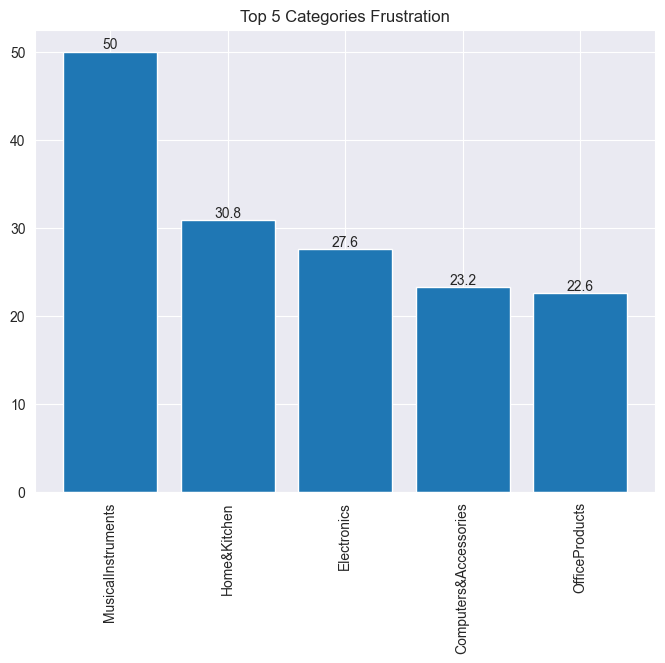

In [111]:
top_frustration_category = df.groupby('broad_category')['emotion'].value_counts(normalize=True).unstack().fillna(0).sort_values(by='Frustration', ascending=False)['Frustration'].head(5)

plt.figure(figsize=(8, 6))
container_bar = plt.bar(top_frustration_category.index, round(top_frustration_category, 3) * 100)
plt.bar_label(container_bar)
plt.title('Top 5 Categories Frustration')
plt.xticks(rotation=90)
plt.show()